<a href="https://colab.research.google.com/github/rmcelfresh/IST718FinalProject/blob/master/Copy_of_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 uninstall statsmodels
!pip3 install numpy scipy patsy pandas
!pip3 install statsmodels


Uninstalling statsmodels-0.9.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/statsmodels-0.9.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.9.0
     |████████████████████████████████| 7.4MB 4.9MB/s 


In [2]:
!git clone https://github.com/rmcelfresh/IST718FinalProject/

Cloning into 'IST718FinalProject'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 18 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [3]:
# import packages for analysis and modeling
import pandas as pd  # data frame operations
!python3.6 -m pip install scipy==1.2 --upgrade

from statsmodels.sandbox.regression.predstd import wls_prediction_std
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
%matplotlib inline

     |████████████████████████████████| 26.6MB 58.7MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


In [4]:
missing_values = ["n/a", "na", "--"]
twitter_polarity = pd.read_csv("IST718FinalProject/reviews_Polarity.csv", na_values = missing_values)
twitter_polarity.head()

,Unnamed: 0,Movie,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,FileName
0,40,AgeofUltron,1.13203E+18,Fri May 24 21:01:14 +0000 2019,"<a href=""http://twitter.com/download/android"" ...",Avengers will return.\n#Avengers\n#AvengersAge...,return AvengersAgeOfUltron,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0000,0.0,AgeofUltron_data
1,41,AgeofUltron,1.13202E+18,Fri May 24 20:35:11 +0000 2019,"<a href=""http://twitter.com/download/android"" ...","""Fury, you son of a bitch""\n""Ooh, you kiss you...",Fury son bitch Ooh kiss mother mouth lAnGu...,"Sentiment(polarity=0.0, subjectivity=0.0)",-0.6908,0.0,AgeofUltron_data
2,42,AgeofUltron,1.13202E+18,Fri May 24 20:32:47 +0000 2019,"<a href=""http://twitter.com/download/android"" ...",fuRy YoU sOn Of A BitCh #AvengersAgeOfUltron,fuRy YoU sOn Of A BitCh AvengersAgeOfUltron,"Sentiment(polarity=0.0, subjectivity=0.0)",-0.8176,0.0,AgeofUltron_data
3,43,AgeofUltron,1.13201E+18,Fri May 24 19:59:56 +0000 2019,"<a href=""http://twitter.com/download/android"" ...",RT @Marvel_Informer: Who else got goosebumps f...,Marvel_Informer Who else got goosebumps lines...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0000,0.0,AgeofUltron_data
4,44,AgeofUltron,1.13201E+18,Fri May 24 19:32:13 +0000 2019,"<a href=""http://twitter.com/download/iphone"" r...",RT @Marvel_Informer: Who else got goosebumps f...,Marvel_Informer Who else got goosebumps lines...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0000,0.0,AgeofUltron_data


In [5]:
pd.pivot_table(twitter_polarity, values='polarity', columns='Movie', aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')

Movie,AgeofUltron,Antman,Antmanthewasp,Aquaman,AvengersEndgame,AvengersInfinityWar,BlackPanther,CivilWar,DawnofJustice,DoctorStrange,GuardiansoftheGalaxy,JusticeLeague,RogueOne,Shazam,Solo,SpidermanFarfromhome,SpidermanHomecoming,SuicideSquad,TheForceAwakens,TheLastJedi,ThorRagnarok,WonderWoman
polarity,0.145708,-0.026944,0.131781,0.182843,0.089621,0.139388,0.203379,0.015877,0.304407,0.161916,0.24203,0.247213,0.051062,0.240115,0.3114,0.159506,0.159455,0.039568,0.235119,0.147334,0.167975,0.245941


In [6]:
missing_values = ["n/a", "na", "--"]
RT_polarity = pd.read_csv("IST718FinalProject/rotten_reviews_Polarity.csv", na_values = missing_values)
RT_polarity.head()

,Unnamed: 0,Movie,FileName,Field_1,text,polarity
0,0,AgeofUltron,AgeofUltron_rm,0,"Fans of the franchise will be pleased, but tho...",0.2382
1,1,AgeofUltron,AgeofUltron_rm,1,"""Avengers: Age of Ultron"" is a sometimes daffy...",0.8813
2,2,AgeofUltron,AgeofUltron_rm,2,"More does not necessarily equal better; here, ...",-0.4031
3,3,AgeofUltron,AgeofUltron_rm,3,"The sharp, interpersonal dramedy that made the...",-0.1655
4,4,AgeofUltron,AgeofUltron_rm,4,"For the most part, ""Avengers: Age of Ultron"" i...",0.0000


In [7]:
t_polarity = twitter_polarity.groupby(['Movie'])['polarity'].mean()
t_polarity = pd.DataFrame(t_polarity)
t_polarity = t_polarity.reset_index(drop=False)
t_polarity

,Movie,polarity
0,AgeofUltron,0.145708
1,Antman,-0.026944
2,Antmanthewasp,0.131781
3,Aquaman,0.182843
4,AvengersEndgame,0.089621
5,AvengersInfinityWar,0.139388
6,BlackPanther,0.203379
7,CivilWar,0.015877
8,DawnofJustice,0.304407
9,DoctorStrange,0.161916


In [8]:
RT_polarity = RT_polarity.groupby(['Movie'])['polarity'].mean()
RT_polarity = pd.DataFrame(RT_polarity)
RT_polarity = RT_polarity.reset_index(drop=False)
RT_polarity

,Movie,polarity
0,AgeofUltron,0.325920
1,Antman,0.447856
2,Antmanthewasp,0.483780
3,Aquaman,0.323176
4,AvengersEndgame,0.464424
5,AvengersInfinityWar,0.155448
6,BlackPanther,0.441759
7,CivilWar,0.267807
8,DawnofJustice,0.090210
9,DoctorStrange,0.379982


In [9]:
missing_values = ["n/a", "na", "--"]
BudgetAndResults = pd.read_csv("IST718FinalProject/BudgetAndResults.csv", na_values = missing_values, encoding = "ISO-8859-1")
BudgetAndResults.head()

,FullMovieName,Month,Day,Year,Budget,Domestic Gross,Worldwide Gross,Universe,Movie
0,Avengers: Age of Ultron,May,1,2015,495000000,459005868,1405403694,MCU,AgeofUltron
1,Ant-man,June,29,2015,160000000,180202163,519311965,MCU,Antman
2,Aquaman,Dec,21,2018,180000000,335061807,1147761807,MCU,Antman
3,Ant-man and the wasp,July,6,2018,162000000,216648740,622674139,MCU,Antmanthewasp
4,Avengers Endgame,Apr,26,2019,365000000,827811359,2734786099,MCU,AvengersEndgame


In [0]:
finalDF = pd.merge(left=BudgetAndResults, right = RT_polarity, how='left', left_on='Movie', right_on='Movie')
finalDF = pd.merge(left=finalDF, right = t_polarity, how='left', left_on='Movie', right_on='Movie')


In [11]:
finalDF

,FullMovieName,Month,Day,Year,Budget,Domestic Gross,Worldwide Gross,Universe,Movie,polarity_x,polarity_y
0,Avengers: Age of Ultron,May,1,2015,495000000,459005868,1405403694,MCU,AgeofUltron,0.325920,0.145708
1,Ant-man,June,29,2015,160000000,180202163,519311965,MCU,Antman,0.447856,-0.026944
2,Aquaman,Dec,21,2018,180000000,335061807,1147761807,MCU,Antman,0.447856,-0.026944
3,Ant-man and the wasp,July,6,2018,162000000,216648740,622674139,MCU,Antmanthewasp,0.483780,0.131781
4,Avengers Endgame,Apr,26,2019,365000000,827811359,2734786099,MCU,AvengersEndgame,0.464424,0.089621
5,Avengers InfinityWar,Apr,27,2018,385000000,678815482,2048359754,MCU,AvengersInfinityWar,0.155448,0.139388
6,Black Panther,Feb,16,2018,200000000,530851601,944951601,MCU,BlackPanther,0.441759,0.203379
7,Captain America: Civil War,May,6,2016,250000000,408084349,1153304495,MCU,CivilWar,0.267807,0.015877
8,Batman v Superman: Dawn of Justice,Mar,25,2016,250000000,330360194,868160194,DCEU,DawnofJustice,0.090210,0.304407
9,Doctor Strange,Nov,4,2016,165000000,232641920,677541920,MCU,DoctorStrange,0.379982,0.161916


In [12]:
print("finalDF ",list(finalDF))

finalDF  ['FullMovieName', 'Month', 'Day', 'Year', 'Budget', 'Domestic Gross', 'Worldwide Gross', 'Universe', 'Movie', 'polarity_x', 'polarity_y']


In [0]:
finalDF.columns = ['FullMovieName', 'Month', 'Day', 'Year', 'Budget', 'DomesticGross', 'WorldwideGross', 'Universe', 'Movie', 'polarity_rt', 'polarity_twitter']

In [14]:
finalDF

,FullMovieName,Month,Day,Year,Budget,DomesticGross,WorldwideGross,Universe,Movie,polarity_rt,polarity_twitter
0,Avengers: Age of Ultron,May,1,2015,495000000,459005868,1405403694,MCU,AgeofUltron,0.325920,0.145708
1,Ant-man,June,29,2015,160000000,180202163,519311965,MCU,Antman,0.447856,-0.026944
2,Aquaman,Dec,21,2018,180000000,335061807,1147761807,MCU,Antman,0.447856,-0.026944
3,Ant-man and the wasp,July,6,2018,162000000,216648740,622674139,MCU,Antmanthewasp,0.483780,0.131781
4,Avengers Endgame,Apr,26,2019,365000000,827811359,2734786099,MCU,AvengersEndgame,0.464424,0.089621
5,Avengers InfinityWar,Apr,27,2018,385000000,678815482,2048359754,MCU,AvengersInfinityWar,0.155448,0.139388
6,Black Panther,Feb,16,2018,200000000,530851601,944951601,MCU,BlackPanther,0.441759,0.203379
7,Captain America: Civil War,May,6,2016,250000000,408084349,1153304495,MCU,CivilWar,0.267807,0.015877
8,Batman v Superman: Dawn of Justice,Mar,25,2016,250000000,330360194,868160194,DCEU,DawnofJustice,0.090210,0.304407
9,Doctor Strange,Nov,4,2016,165000000,232641920,677541920,MCU,DoctorStrange,0.379982,0.161916


In [0]:
data2=finalDF

In [16]:
from sklearn.preprocessing import LabelEncoder

# Label encoding ConfAbbr

lb_make = LabelEncoder()
data2["Month_code"] = lb_make.fit_transform(data2["Month"].astype(str))
data2[["Month", "Month_code"]].head()

,Month,Month_code
0,May,9
1,June,7
2,Dec,2
3,July,5
4,Apr,0


In [17]:
# review the size of the dataset
data2.shape

(21, 12)

In [18]:
data2.dtypes


FullMovieName        object
Month                object
Day                   int64
Year                  int64
Budget                int64
DomesticGross         int64
WorldwideGross        int64
Universe             object
Movie                object
polarity_rt         float64
polarity_twitter    float64
Month_code            int64
dtype: object

In [19]:
# Statistical Summary of Numeric Variables
data2.describe()

,Day,Year,Budget,DomesticGross,WorldwideGross,polarity_rt,polarity_twitter,Month_code
count,21.000000,21.000000,2.100000e+01,2.100000e+01,2.100000e+01,21.000000,21.000000,21.000000
mean,12.380952,2016.761905,2.341905e+08,4.090941e+08,1.049987e+09,0.332529,0.153591,4.761905
std,9.340643,1.374946,9.549378e+07,2.128563e+08,5.948439e+08,0.164692,0.100554,3.767025
min,1.000000,2014.000000,1.000000e+08,1.396304e+08,3.630304e+08,-0.120457,-0.026944,0.000000
25%,5.000000,2016.000000,1.700000e+08,2.326419e+08,6.775419e+08,0.267807,0.089621,2.000000
50%,10.000000,2017.000000,2.000000e+08,3.342011e+08,8.681602e+08,0.379982,0.159455,4.000000
75%,18.000000,2018.000000,3.000000e+08,5.308516e+08,1.153304e+09,0.461304,0.240115,9.000000
max,29.000000,2019.000000,4.950000e+08,9.366622e+08,2.734786e+09,0.503318,0.311400,10.000000


In [20]:
# find max amounts
print("Heighest of Budget:       ", data2['Budget'].max())
print("Heighest of Domestic Gross:       ", data2['DomesticGross'].max())
print("Heighest of Worldwide Gross:       ", data2['WorldwideGross'].max())
print("Heighest of Polarity from Twitter:       ", data2['polarity_twitter'].max())
print("Heighest of Polarity from Rotten Tomato:       ", data2['polarity_rt'].max())

Heighest of Budget:        495000000
Heighest of Domestic Gross:        936662225
Heighest of Worldwide Gross:        2734786099
Heighest of Polarity from Twitter:        0.3114
Heighest of Polarity from Rotten Tomato:        0.5033183381088823


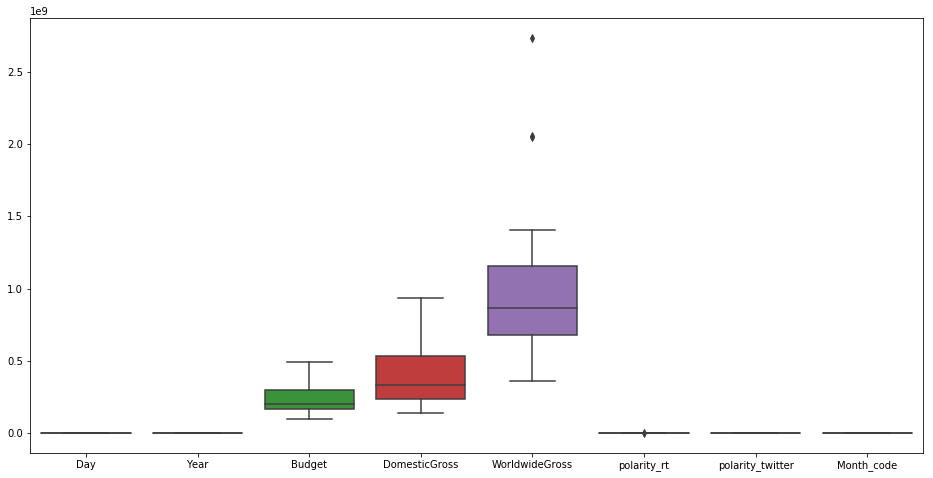

In [21]:
# Boxplot for all
plt.figure(figsize=(16, 8))
sns.boxplot(data=data2)

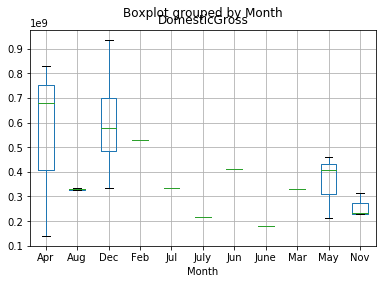

In [22]:
# TotalPay by conference
data2.boxplot(column='DomesticGross', by = 'Month')

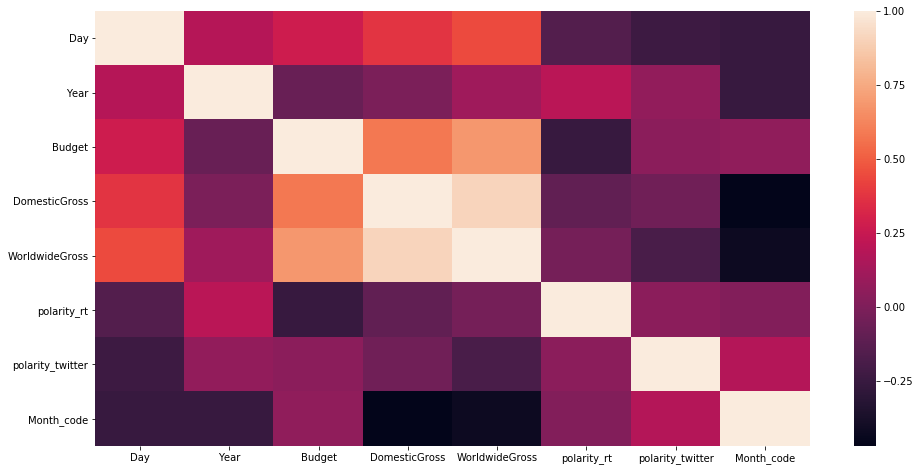

In [23]:
# Calculate correlations
corr = data2.corr()
 
# Heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr)

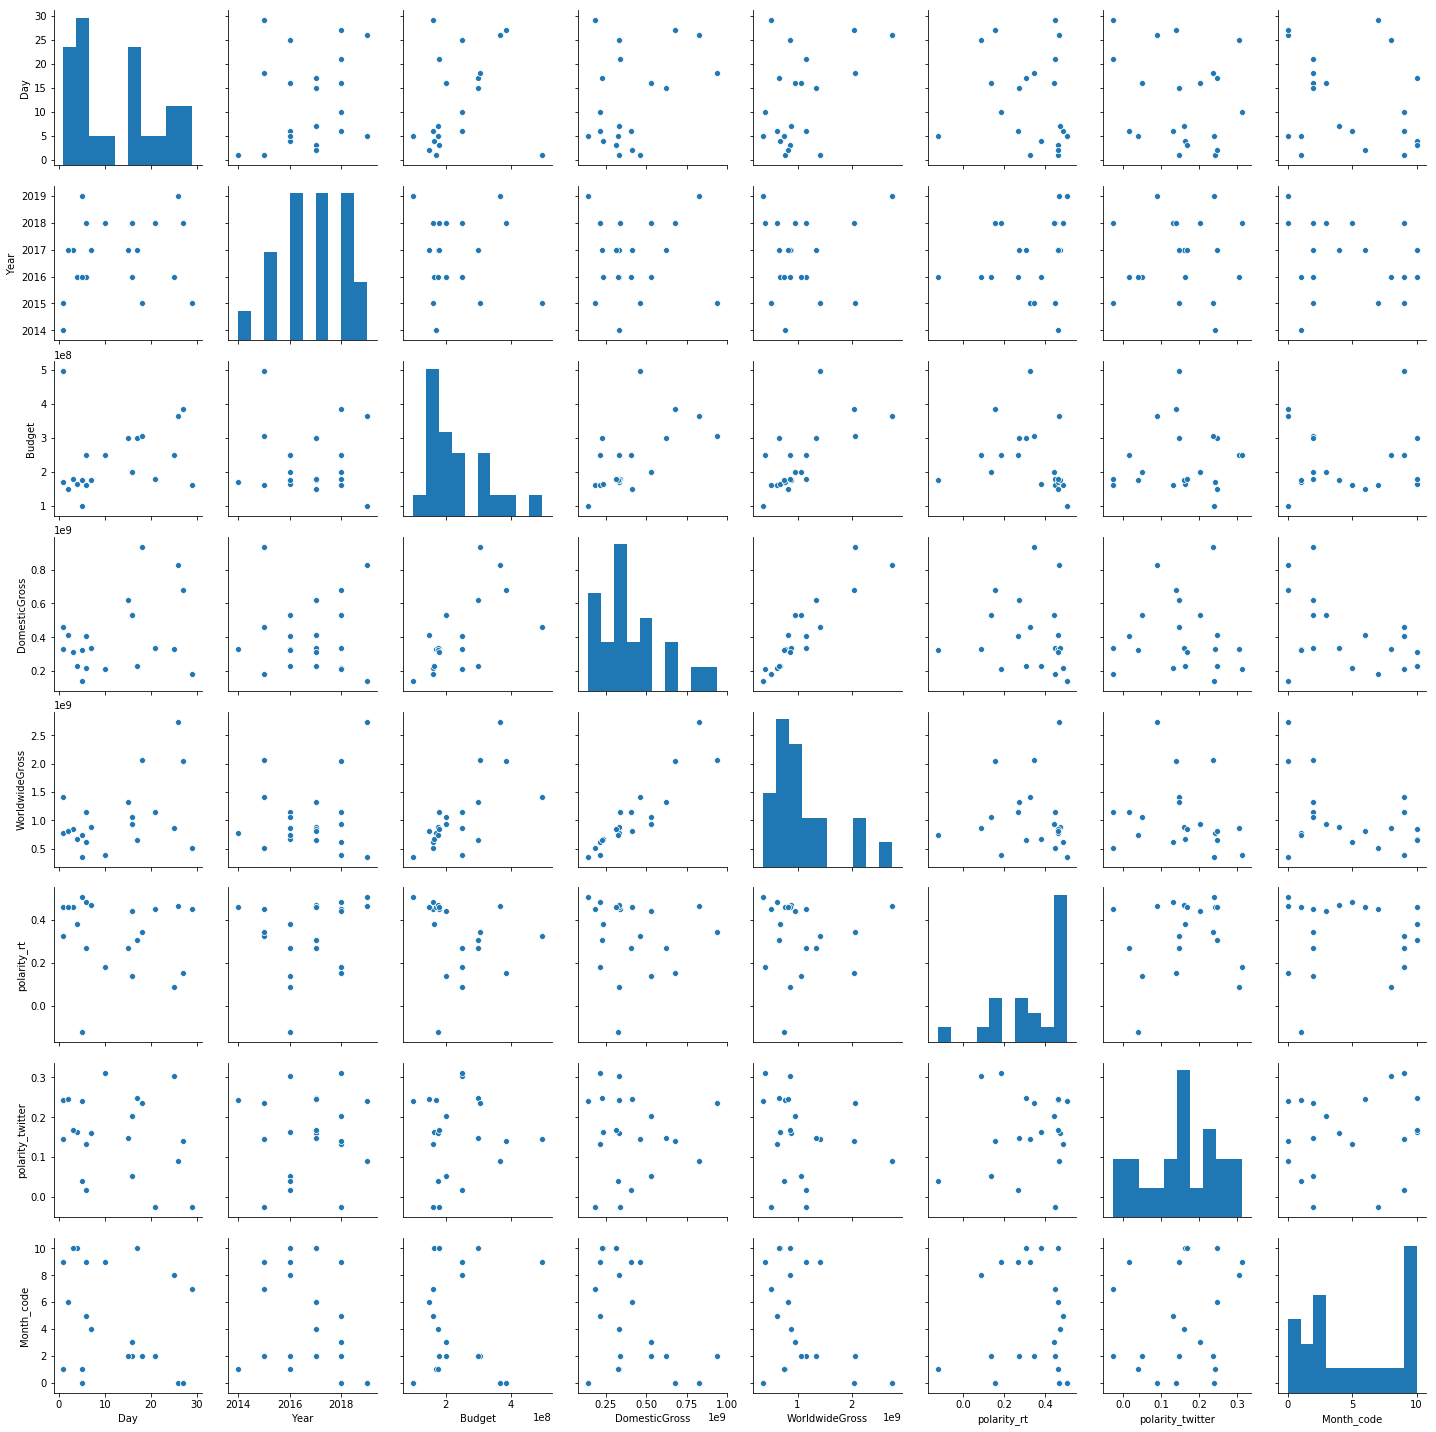

In [24]:
# pairplots showing the relationship and distribution
sns.pairplot(data2)

Data Predictive Model
Model1 - Multiple Linear Regression

In [0]:
# create training and test datasets
np.random.seed(1234)
data2['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(data2))
data2_train = data2[data2['runiform'] >= 0.33]
data2_test = data2[data2['runiform'] < 0.33]

In [26]:
# check training data frame
print('\SusItems_train data frame (rows, columns): ',data2_train.shape)
print(data2_train.head())

\SusItems_train data frame (rows, columns):  (17, 13)
                FullMovieName Month  ...  Month_code  runiform
1                     Ant-man  June  ...           7  0.622109
2                     Aquaman   Dec  ...           2  0.437728
3        Ant-man and the wasp  July  ...           5  0.785359
4            Avengers Endgame   Apr  ...           0  0.779976
7  Captain America: Civil War   May  ...           9  0.801872

[5 rows x 13 columns]


In [27]:
# check test data frame
print('\SusItems_test data frame (rows, columns): ',data2_test.shape)
print(data2_test.head())

\SusItems_test data frame (rows, columns):  (4, 13)
                           FullMovieName Month  ...  Month_code  runiform
0                Avengers: Age of Ultron   May  ...           9  0.191519
5                   Avengers InfinityWar   Apr  ...           0  0.272593
6                          Black Panther   Feb  ...           3  0.276464
17  Star Wars Ep. VII: The Force Awakens   Dec  ...           2  0.013768

[4 rows x 13 columns]


In [28]:
data2_train.dtypes

FullMovieName        object
Month                object
Day                   int64
Year                  int64
Budget                int64
DomesticGross         int64
WorldwideGross        int64
Universe             object
Movie                object
polarity_rt         float64
polarity_twitter    float64
Month_code            int64
runiform            float64
dtype: object

In [39]:
# review results for each row
# specify a simple model
my_model = str('WorldwideGross ~ Budget+polarity_twitter+polarity_rt+Month+Universe')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = data2).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:         WorldwideGross   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     2.705
Date:                Mon, 17 Jun 2019   Prob (F-statistic):              0.138
Time:                        03:54:40   Log-Likelihood:                -430.36
No. Observations:                  21   AIC:                             892.7
Df Residuals:                       5   BIC:                             909.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          2.12e+08   5.36e+08  

In [41]:
# review results for each row
# specify a simple model
my_model = str('WorldwideGross ~ Budget+polarity_twitter+polarity_rt+Month')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = data2).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:         WorldwideGross   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     2.407
Date:                Mon, 17 Jun 2019   Prob (F-statistic):              0.124
Time:                        03:56:59   Log-Likelihood:                -435.72
No. Observations:                  21   AIC:                             899.4
Df Residuals:                       7   BIC:                             914.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.435e+08   5.75e+08  

In [42]:
# review results for each row
# specify a simple model
my_model = str('WorldwideGross ~ Budget+polarity_twitter+Month')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = data2).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:         WorldwideGross   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     2.585
Date:                Mon, 17 Jun 2019   Prob (F-statistic):             0.0924
Time:                        03:56:59   Log-Likelihood:                -436.93
No. Observations:                  21   AIC:                             899.9
Df Residuals:                       8   BIC:                             913.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.425e+08   4.71e+08  

In [43]:
# review results by variables
# specify a simple model
my_model = str('WorldwideGross ~ C(DomesticGross) + C(Budget) + C(polarity_twitter)')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = data2).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:         WorldwideGross   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 17 Jun 2019   Prob (F-statistic):                nan
Time:                        03:56:59   Log-Likelihood:                 253.97
No. Observations:                  21   AIC:                            -465.9
Df Residuals:                       0   BIC:                            -444.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1549: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1550: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1558: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


**Poor model result**

**Model 2 - Mixed Linear Model Regression**

In [44]:
import statsmodels.formula.api as smf
# include conference_code as a classifier
model2 = smf.mixedlm("WorldwideGross ~  Budget + polarity_twitter + polarity_rt", data2, groups=data2["Month_code"])

model2f = model2.fit()

print(model2f.summary())

                             Mixed Linear Model Regression Results
Model:                     MixedLM          Dependent Variable:          WorldwideGross         
No. Observations:          21               Method:                      REML                   
No. Groups:                11               Scale:                       137270632355567616.0000
Min. group size:           1                Likelihood:                  -381.9018              
Max. group size:           4                Converged:                   Yes                    
Mean group size:           1.9                                                                  
------------------------------------------------------------------------------------------------
                         Coef.            Std.Err.     z    P>|z|      [0.025         0.975]    
------------------------------------------------------------------------------------------------
Intercept                -66592652.218 359434006.747 -0.185 

In [45]:
import statsmodels.formula.api as smf
# include conference_code as a classifier
model2 = smf.mixedlm("WorldwideGross ~  Budget + polarity_twitter + polarity_rt", data2, groups=data2["Movie"])

model2f = model2.fit()

print(model2f.summary())

                              Mixed Linear Model Regression Results
Model:                      MixedLM          Dependent Variable:          WorldwideGross         
No. Observations:           21               Method:                      REML                   
No. Groups:                 20               Scale:                       144480988312833792.0000
Min. group size:            1                Likelihood:                  -382.5213              
Max. group size:            2                Converged:                   Yes                    
Mean group size:            1.1                                                                  
-------------------------------------------------------------------------------------------------
                         Coef.            Std.Err.      z    P>|z|      [0.025         0.975]    
-------------------------------------------------------------------------------------------------
Intercept                -12103215.958  397330718.

Model: WorldwideGross = 2.638 * DomesticGross - 0.513 * Budget - 570110841.325 * polarity_twitter - 184143979.376 * polarity_rt + 195203030.258

In [46]:
import statsmodels.formula.api as smf
# include conference_code as a classifier
model2 = smf.mixedlm("DomesticGross ~ Budget + polarity_twitter + polarity_rt", data2, groups=data2["Month_code"])

model2f = model2.fit()

print(model2f.summary())

                            Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         DomesticGross         
No. Observations:          21              Method:                     REML                  
No. Groups:                11              Scale:                      23831750489900208.0000
Min. group size:           1               Likelihood:                 -367.2586             
Max. group size:           4               Converged:                  Yes                   
Mean group size:           1.9                                                               
---------------------------------------------------------------------------------------------
                        Coef.            Std.Err.     z    P>|z|     [0.025         0.975]   
---------------------------------------------------------------------------------------------
Intercept                55415571.934 151630649.295  0.365 0.715 -241775039.637 35260618

Model: DomesticGross = 0.128 * Budget - 13196882.574 * polarity_twitter - 179606555.662 * polarity_rt + 406603166.043